In [15]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


/tmp/ipykernel_1771035/2817817116.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [16]:
# Read the csv file using read_csv
# method of pandas
df = pd.read_csv('ADANI.csv')
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-02,2325.000000,2362.300049,2311.000000,2339.500000,2338.505859,1006544
1,2022-05-04,2358.699951,2362.899902,2233.050049,2253.800049,2252.842285,1744686
2,2022-05-05,2270.000000,2303.800049,2236.000000,2255.399902,2254.441650,1636796
3,2022-05-06,2210.000000,2262.000000,2200.000000,2247.699951,2246.744873,1161579
4,2022-05-09,2229.500000,2244.199951,2180.000000,2197.649902,2196.716064,1450886
...,...,...,...,...,...,...,...
243,2023-04-25,1806.000000,1913.750000,1801.800049,1844.599976,1844.599976,5364841
244,2023-04-26,1854.000000,1874.000000,1826.400024,1847.900024,1847.900024,2422711
245,2023-04-27,1848.000000,1864.949951,1832.550049,1853.050049,1853.050049,1782360
246,2023-04-28,1868.050049,1944.000000,1857.150024,1924.949951,1924.949951,6159130


In [17]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df

# drop The original date column
df = df.drop(['Date'], axis='columns')
df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-02,2325.000000,2362.300049,2311.000000,2339.500000,2338.505859,1006544
2022-05-04,2358.699951,2362.899902,2233.050049,2253.800049,2252.842285,1744686
2022-05-05,2270.000000,2303.800049,2236.000000,2255.399902,2254.441650,1636796
2022-05-06,2210.000000,2262.000000,2200.000000,2247.699951,2246.744873,1161579
2022-05-09,2229.500000,2244.199951,2180.000000,2197.649902,2196.716064,1450886
...,...,...,...,...,...,...
2023-04-25,1806.000000,1913.750000,1801.800049,1844.599976,1844.599976,5364841
2023-04-26,1854.000000,1874.000000,1826.400024,1847.900024,1847.900024,2422711
2023-04-27,1848.000000,1864.949951,1832.550049,1853.050049,1853.050049,1782360


In [19]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
  
# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y


array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0])

In [53]:
from sklearn.metrics import confusion_matrix

split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

# Support vector classifier
# cls = SVC().fit(X_train, y_train)
# cls = SVC(kernel='sigmoid').fit(X_train, y_train)
cls = SVC(kernel='poly').fit(X_train, y_train)

y_pred = cls.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print(f"Accuracy: {accuracy:.2f}")

[[ 0 25]
 [ 0 25]]
Accuracy: 0.50


In [45]:
df['Predicted_Signal'] = cls.predict(X)
# Calculate daily returns
df['Return'] = df.Close.pct_change()
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df
# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df


,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2022-05-02,2325.000000,2362.300049,2311.000000,2339.500000,2338.505859,1006544,-14.500000,51.300049,1,NaN,NaN,NaN,NaN
2022-05-04,2358.699951,2362.899902,2233.050049,2253.800049,2252.842285,1744686,104.899902,129.849853,1,-0.036632,-0.036632,-0.036632,-0.036632
2022-05-05,2270.000000,2303.800049,2236.000000,2255.399902,2254.441650,1636796,14.600098,67.800049,1,0.000710,0.000710,-0.035922,-0.035922
2022-05-06,2210.000000,2262.000000,2200.000000,2247.699951,2246.744873,1161579,-37.699951,62.000000,1,-0.003414,-0.003414,-0.039336,-0.039336
2022-05-09,2229.500000,2244.199951,2180.000000,2197.649902,2196.716064,1450886,31.850098,64.199951,1,-0.022267,-0.022267,-0.061603,-0.061603
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-25,1806.000000,1913.750000,1801.800049,1844.599976,1844.599976,5364841,-38.599976,111.949951,1,0.023669,0.023669,0.025841,0.342603
2023-04-26,1854.000000,1874.000000,1826.400024,1847.900024,1847.900024,2422711,6.099976,47.599976,1,0.001789,0.001789,0.027630,0.344392
2023-04-27,1848.000000,1864.949951,1832.550049,1853.050049,1853.050049,1782360,-5.050049,32.399902,1,0.002787,0.002787,0.030417,0.347179


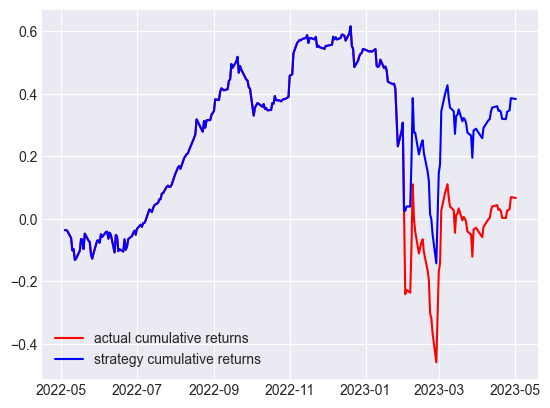

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red',label = 'actual cumulative returns')
plt.plot(df['Cum_Strategy'],color='blue',label = 'strategy cumulative returns')

plt.legend()


Epoch 1/10
12/12 [==============================] - 1s 3ms/step - loss: 0.0278
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 4/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 5/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 6/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0040
Epoch 7/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 8/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0041
Epoch 9/10
12/12 [==============================] - 0s 3ms/step - loss: 0.0039
Epoch 10/10
2/2 [==============================] - 0s 2ms/step


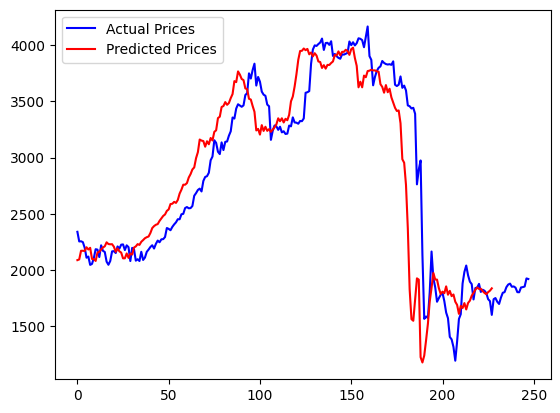

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

# Load the stock price data
data = pd.read_csv('ADANI.csv')

# Extract the 'Close' column for prediction
closing_prices = data['Close'].values

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences and labels for training
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        labels.append(data[i+sequence_length])
    return np.array(sequences), np.array(labels)

sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)



# Scale the predictions back to the original range
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1)).ravel()
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()


# Plot the predicted vs actual prices
plt.plot(closing_prices, color='blue', label='Actual Prices')
plt.plot(np.concatenate([train_predictions, test_predictions]), color='red', label='Predicted Prices')
plt.legend()
plt.show()


2023-05-26 22:58:40.805237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-26 22:58:40.806816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-26 22:58:40.808042: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2023-05-26 22:58:41.117534: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-26 22:58:41.118735: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-26 22:58:41.119965: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

12/12 [==============================] - 4s 10ms/step - loss: 0.1735
Epoch 2/10
12/12 [==============================] - 0s 12ms/step - loss: 0.0368
Epoch 3/10
12/12 [==============================] - 0s 13ms/step - loss: 0.0228
Epoch 4/10
12/12 [==============================] - 0s 14ms/step - loss: 0.0176
Epoch 5/10
12/12 [==============================] - 0s 11ms/step - loss: 0.0138
Epoch 6/10
12/12 [==============================] - 0s 10ms/step - loss: 0.0124
Epoch 7/10
12/12 [==============================] - 0s 13ms/step - loss: 0.0118
Epoch 8/10
12/12 [==============================] - 0s 13ms/step - loss: 0.0116
Epoch 9/10
12/12 [==============================] - 0s 12ms/step - loss: 0.0114
Epoch 10/10
12/12 [==============================] - 0s 13ms/step - loss: 0.0117


2023-05-26 22:58:46.613320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-26 22:58:46.614751: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-26 22:58:46.615870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2/2 [==============================] - 0s 4ms/step
Training MAE: 189.90005431399604
Testing MAE: 134.6839843439453
Training MSE: 97297.97048806465
Testing MSE: 30846.350315588374
Training RMSE: 311.9262260344017
Testing RMSE: 175.63129082139199
Profit: 3281.6422222031797


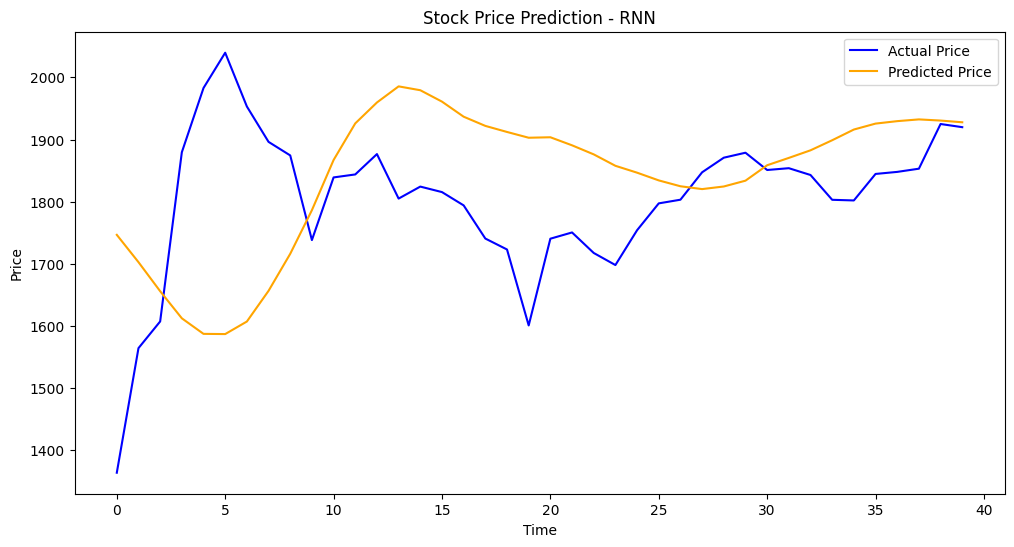

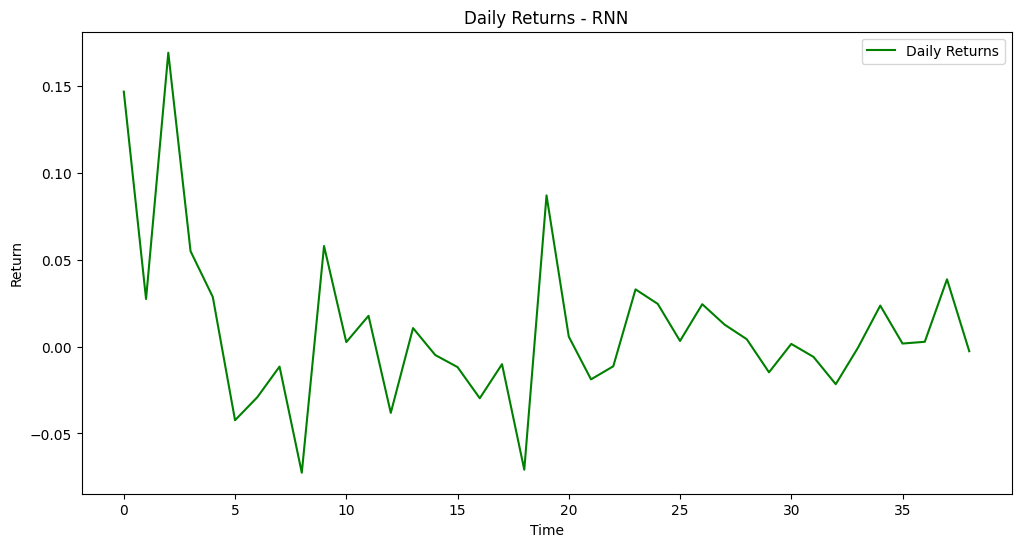

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the stock price data
data = pd.read_csv('ADANI.csv')

# Extract the 'Close' column for prediction
closing_prices = data['Close'].values

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences and labels for training
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        labels.append(data[i+sequence_length])
    return np.array(sequences), np.array(labels)

sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Scale the predictions back to the original range
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1)).ravel()
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

# Calculate metrics
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Calculate profits based on a simple trading strategy
buy_threshold = 0.02  # Percentage increase threshold to buy
sell_threshold = -0.01  # Percentage decrease threshold to sell
initial_investment = 10000  # Initial investment amount
shares = 0
cash = initial_investment

for i in range(len(test_predictions)):
    price_change = (y_test[i] - y_test[i-1]) / y_test[i-1]  # Percentage price change from the previous day
    
    if price_change > buy_threshold:
        shares_to_buy = cash / y_test[i]
        shares += shares_to_buy
        cash = 0
    elif price_change < sell_threshold:
        cash_to_sell = shares * y_test[i]
        cash += cash_to_sell
        shares = 0

final_balance = cash + (shares * y_test[-1])
profit = final_balance - initial_investment

# Print the metrics and profit
# print("Training MAE:", train_mae)
# print("Testing MAE:", test_mae)
# print("Training MSE:", train_mse)
# print("Testing MSE:", test_mse)
# print("Training RMSE:", train_rmse)
# print("Testing RMSE:", test_rmse)
print("Profit:", profit)


# Plot transactions for RNN
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Price', color='blue')
plt.plot(test_predictions, label='Predicted Price', color='orange')
plt.title('Stock Price Prediction - RNN')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate daily returns for RNN

daily_returns_rnn = np.diff(y_test) / y_test[:-1]

# Plot returns for RNN
plt.figure(figsize=(12, 6))
plt.plot(daily_returns_rnn, label='Daily Returns', color='green')
plt.title('Daily Returns - RNN')
plt.xlabel('Time')
plt.ylabel('Return')
plt.legend()
plt.show()


Training MAE: 18.91809628032439
Testing MAE: 205.0769960831859
Training MSE: 702.6359092187679
Testing MSE: 62724.81247935265
Training RMSE: 26.507280305960624
Testing RMSE: 250.44922135904645
Profit: 3281.6422222031797


/home/siddharth/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


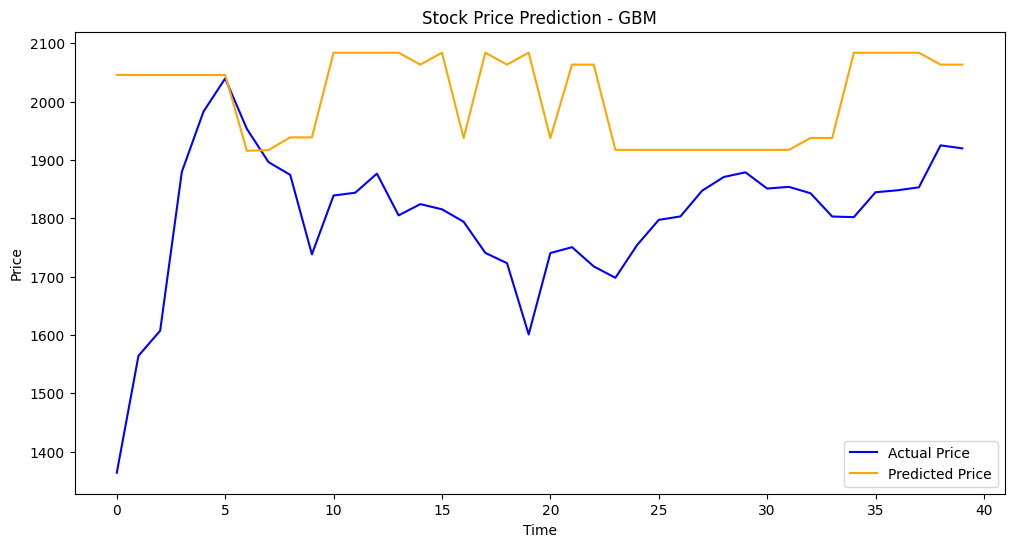

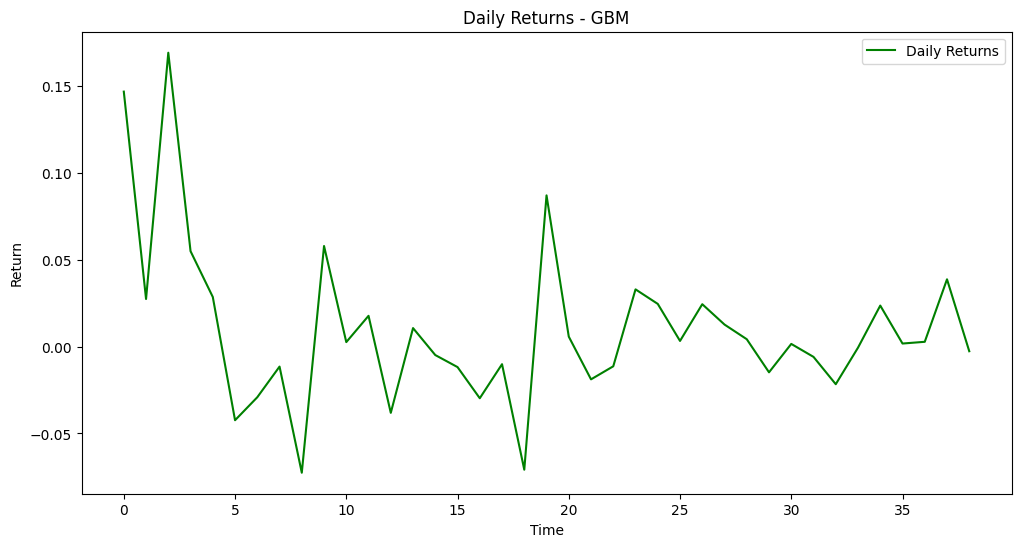

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the stock price data
data = pd.read_csv('ADANI.csv')

# Extract the 'Close' column for prediction
closing_prices = data['Close'].values

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences and labels for training
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        labels.append(data[i+sequence_length])
    return np.array(sequences), np.array(labels)

sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Flatten the input sequences
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Build the GBM model
model = GradientBoostingRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Scale the predictions back to the original range
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1)).ravel()
y_train = scaler.inverse_transform(y_train.reshape(-1, 1)).ravel()
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1)).ravel()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

# Calculate metrics
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Calculate profits based on a simple trading strategy
buy_threshold = 0.02  # Percentage increase threshold to buy
sell_threshold = -0.01  # Percentage decrease threshold to sell
initial_investment = 10000  # Initial investment amount
shares = 0
cash = initial_investment

for i in range(len(test_predictions)):
    price_change = (y_test[i] - y_test[i-1]) / y_test[i-1]  # Percentage price change from the previous day
    
    if price_change > buy_threshold:
        shares_to_buy = cash / y_test[i]
        shares += shares_to_buy
        cash = 0
    elif price_change < sell_threshold:
        cash_to_sell = shares * y_test[i]
        cash += cash_to_sell
        shares = 0

final_balance = cash + (shares * y_test[-1])
profit = final_balance - initial_investment

# Print the metrics and profit
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Profit:", profit)


plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Price', color='blue')
plt.plot(test_predictions, label='Predicted Price', color='orange')
plt.title('Stock Price Prediction - GBM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate daily returns for GBM
daily_returns_gbm = np.diff(y_test) / y_test[:-1]

# Plot returns for GBM
plt.figure(figsize=(12, 6))
plt.plot(daily_returns_gbm, label='Daily Returns', color='green')
plt.title('Daily Returns - GBM')
plt.xlabel('Time')
plt.ylabel('Return')
plt.legend()
plt.show()




Training MAE: 56.77383822566663
Testing MAE: 131.87582411686495
Training MSE: 7567.495390615514
Testing MSE: 45584.05671794082
Training RMSE: 86.99135238985261
Testing RMSE: 213.50423114763046
Profit: 3281.6422222031797


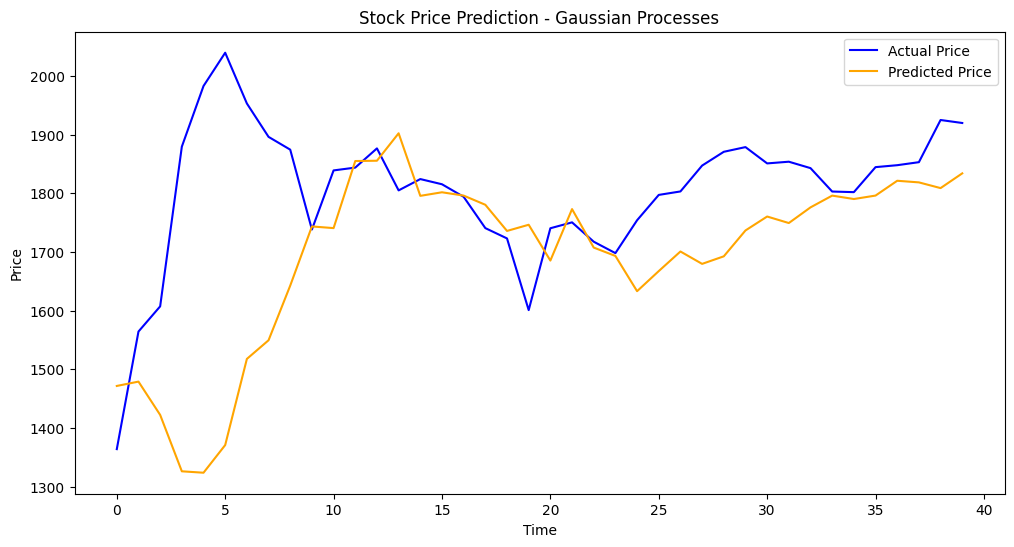

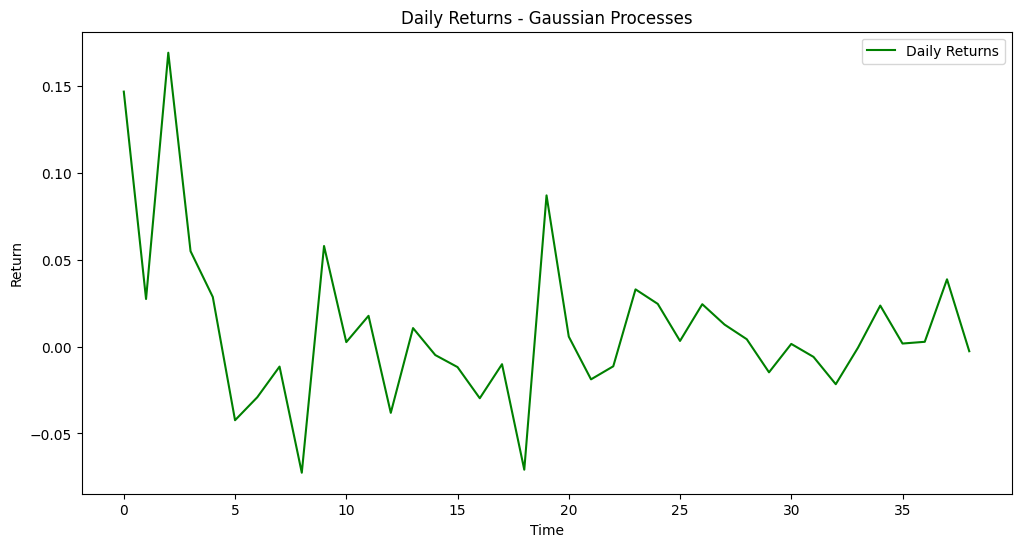

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the stock price data
data = pd.read_csv('ADANI.csv')

# Extract the 'Close' column for prediction
closing_prices = data['Close'].values

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices.reshape(-1, 1))

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences and labels for training
def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        labels.append(data[i+sequence_length])
    return np.array(sequences), np.array(labels)

sequence_length = 10
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Flatten the input sequences
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Define the kernel for the GP model
kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=1.0)

# Create the GP regressor
model = GaussianProcessRegressor(kernel=kernel)

# Train the GP model
model.fit(X_train, y_train)

# Make predictions
train_predictions, train_std = model.predict(X_train, return_std=True)
test_predictions, test_std = model.predict(X_test, return_std=True)

# Scale the predictions back to the original range
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1)).ravel()
y_train = scaler.inverse_transform(y_train.reshape(-1, 1)).ravel()
test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1)).ravel()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

# Calculate metrics
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# Calculate profits based on a simple trading strategy
buy_threshold = 0.02  # Percentage increase threshold to buy
sell_threshold = -0.01  # Percentage decrease threshold to sell
initial_investment = 10000  # Initial investment amount
shares = 0
cash = initial_investment

for i in range(len(test_predictions)):
    price_change = (y_test[i] - y_test[i-1]) / y_test[i-1]  # Percentage price change from the previous day
    
    if price_change > buy_threshold:
        shares_to_buy = cash / y_test[i]
        shares += shares_to_buy
        cash = 0
    elif price_change < sell_threshold:
        cash_to_sell = shares * y_test[i]
        cash += cash_to_sell
        shares = 0

final_balance = cash + (shares * y_test[-1])
profit = final_balance - initial_investment

# Print the metrics and profit
print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Profit:", profit)

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Price', color='blue')
plt.plot(test_predictions, label='Predicted Price', color='orange')
plt.title('Stock Price Prediction - Gaussian Processes')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate daily returns for Gaussian Processes
daily_returns_gp = np.diff(y_test) / y_test[:-1]

# Plot returns for Gaussian Processes
plt.figure(figsize=(12, 6))
plt.plot(daily_returns_gp, label='Daily Returns', color='green')
plt.title('Daily Returns - Gaussian Processes')
plt.xlabel('Time')
plt.ylabel('Return')
plt.legend()
plt.show()


Mean Squared Error: 624291.1094349074


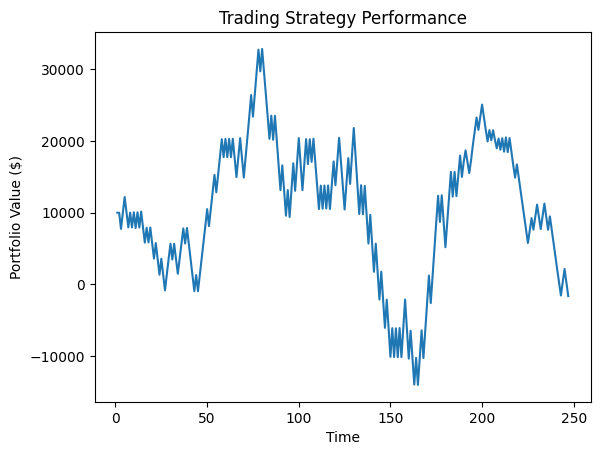

Final Portfolio Value: -1626.6989710000112


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('ADANI.csv')

# Extract the features and target variable
X = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Support Vector Regression model with RBF kernel
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test)






data['Predicted'] = svm_model.predict(X)

# Calculate the daily returns
data['Return'] = data['Close'].pct_change()

# Set the initial capital
initial_capital = 10000

# Buy and sell signals
data['Signal'] = 0
data.loc[data['Predicted'].shift() < data['Predicted'], 'Signal'] = 1
data.loc[data['Predicted'].shift() > data['Predicted'], 'Signal'] = -1

# Calculate position
data['Position'] = data['Signal'].shift()

# Calculate portfolio holdings and cash
data['Holdings'] = data['Position'] * data['Close']
data['Cash'] = initial_capital - (data['Position'] * data['Close']).cumsum()

# Calculate total portfolio value
data['Portfolio Value'] = data['Cash'] + data['Holdings']

# Plot the portfolio value
plt.plot(data['Portfolio Value'])
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.title('Trading Strategy Performance')
plt.show()

final_portfolio_value = data['Portfolio Value'].iloc[-1]
print(f"Final Portfolio Value: {final_portfolio_value}")




In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Load the data from the CSV file
data = pd.read_csv('ADANI.csv')

# Extract the features and target variable
X = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Support Vector Regression model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Define a trading strategy using SVM predictions
def trading_strategy(prices, predictions):
    positions = []
    for i in range(len(predictions)):
        if predictions[i] > prices[i]:
            positions.append(1)  # Buy signal
        elif predictions[i] < prices[i]:
            positions.append(-1)  # Sell signal
        else:
            positions.append(0)  # No change in position
    return positions

# Apply the trading strategy
positions = trading_strategy(data['Close'][:-1], y_pred[:-1])

# Calculate daily returns based on the positions
returns = data['Close'].pct_change().shift(-1) * positions

# Calculate the cumulative returns
cumulative_returns = (1 + returns).cumprod()

# Calculate the total profit
initial_capital = 100000  # Initial capital in dollars
total_profit = initial_capital * (cumulative_returns[-1] - 1)

print(f"Total Profit: {total_profit:.2f}")


Mean Squared Error: 624291.1094349074


ValueError: operands could not be broadcast together with shapes (248,) (49,) 